<a href="https://colab.research.google.com/github/GeraldoLucas/Covid-analise-DNC/blob/main/Covid_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doenças neurológicas em pacientes com covid e fatores relacionados;

O conjunto de dados analisado é referente às notificações de Síndrome Respiratória Aguda Grave (SRAG) – disponibilizados pelo [Ministério da Saúde](https://opendatasus.saude.gov.br/dataset/bd-srag-2020) em:  – este traz informações acerca da vigilância da COVID-19, a infecção humana causada pelo novo Coronavírus, foi incorporada na rede de vigilância da Influenza e outros vírus respiratórios.
O dataset contempla o período entre os anos de 2009 até 2021.

Após o download do arquivo em .csv que possui cerca de 630 MB, o arquivo foi importado em um editor de texto (Pycharm, no meu caso), e , logo em seguida, foi selecionado algumas das várias colunas disponilibilizadas pelo Ministério da Saúde, a ficha de notificação e o dicionario dos dados estão destacados:


*   [FICHA DE REGISTRO INDIVIDUAL (SRAG) ](https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/54a46c6d-e0b5-40b7-8b74-85450d22ace3/download/ficha-srag-final-27.07.2020_final.pdf)
*   [Dicionário de Dados ](https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/8f571374-c555-4ec0-8e44-00b1e8b11c25/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf)




In [ ]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 0)

# Importar dos dados sobre Doenças Neurológicas Crônicas em pacientes com Covid para um DataFrame
uri = r"C:/Users/***/***/******/*****/********/******/INFLUD-15-03-2021.csv"
dF = pd.read_csv(uri, sep=';',
                 error_bad_lines=True,
                 warn_bad_lines=True,
                 engine="python",
                 encoding='UTF-8')

print(f"Número total de Casos considerados: {dF.shape[0]}")

# Selecionando colunas consideradas na análise
dF_columns = ['ID_MUNICIP',
              'NU_IDADE_N',
              'CS_SEXO',
              'DT_SIN_PRI',
              'NEUROLOGIC',
              'PERD_OLFT',
              'PERD_PALA',
              'CLASSI_FIN',
              'CRITERIO',
              'EVOLUCAO',]

dF_review = dF.loc[:, dF_columns].copy()

# Exportando a tabela gerada para um novo Csv para trabalho de dados
dF_review.to_csv('dF_review.csv', index=False)


O conjunto de dados contém 1.186.861 linhas e 154 colunas. Considerando o grande volume de informações, o primeiro a ser feito foi o recolhimento de registros específicos úteis na análise como, município, idade, sexo, Doença Neurológica Crônica etc.

In [1]:
# Importação bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uri = "dF_review.csv"

dF_review = pd.read_csv(uri,                  
                 error_bad_lines=True,
                 warn_bad_lines=True,
                 engine="python",
                 encoding='UTF-8')

print(f"Número de Casos considerados: {dF_review.shape[0]} linhas e {dF_review.shape[1]} colunas.")

dF_review.head(10)

FileNotFoundError: ignored

In [ ]:
# Dados DNC úteis - sem None - length: 494.202;
dF_neurologic = dF_review.dropna(subset=["NEUROLOGIC"])

# Pacientes apresentaram "Sim para DNC" - length = 56.384;
dF_neurologic = dF_neurologic.loc[dF_neurologic["NEUROLOGIC"] == 1]

# Pacientes apresentaram DNC e teste Covid positivo, length = 26.192;
dF_positive = dF_neurologic.loc[dF_neurologic["CLASSI_FIN"] == 5]


print(f"Número total de Casos DNC com Covid úteis: {dF_positive.shape[0]} linhas.")

print(f"O paciente mais velho com DNC e covid: {dF_positive['NU_IDADE_N'].max()} anos.")

print(f"Média de idade dos paciente com DNC e covid: {dF_positive['NU_IDADE_N']. mean():.2f} anos.")

dF_positive

Número total de Casos DNC com Covid úteis: 26192 linhas.
O paciente mais velho com DNC e covid: 111 anos.
Média de idade dos paciente com DNC e covid: 71.68 anos.


,ID_MUNICIP,NU_IDADE_N,CS_SEXO,NEUROLOGIC,CLASSI_FIN,CRITERIO,EVOLUCAO
170,SAO PAULO,62,M,1.0,5.0,1.0,1.0
189,SAO PAULO,81,M,1.0,5.0,1.0,2.0
240,SAO PAULO,9,F,1.0,5.0,1.0,2.0
245,SAO PAULO,78,F,1.0,5.0,1.0,2.0
464,RIO DE JANEIRO,93,M,1.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...
1186633,MOSSORO,84,M,1.0,5.0,1.0,2.0
1186812,SAO PAULO,89,F,1.0,5.0,1.0,1.0
1186826,RIO DE JANEIRO,66,M,1.0,5.0,4.0,NaN
1186838,SANTO ANDRE,85,F,1.0,5.0,1.0,1.0


#Contagem de infecção para pacientes do grupo de risco para DNC

Uma primeira análise feita diz respeito ao número de acometidos pela Covid com DNC e a tendência do gráfico. Nesse sentido, uma informação facilmente percebida no gráfico é que existe **há mais pacientes idosos na relação**.





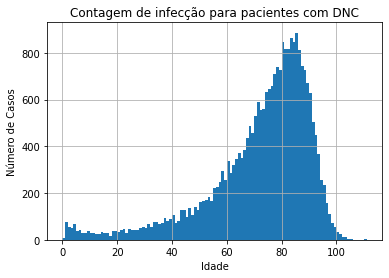

In [ ]:
# Distribuição etária para DNC infectados
age = dF_positive.NU_IDADE_N.value_counts(normalize=True)
interval = (dF_positive['NU_IDADE_N'].max() - dF_positive['NU_IDADE_N'].min())

dF_positive.hist(column="NU_IDADE_N", bins=interval)
plt.xlabel('Idade')
plt.ylabel('Número de Casos')
plt.title(f"Contagem de infecção para pacientes com DNC")
plt.grid(True)
plt.show()

In [ ]:
# Amostra onde os pacientes apresentaram DNC e Covid óbitos, length = 14.037
dF_obitos = dF_positive.loc[dF_positive["EVOLUCAO"] == 2]

print(f"Número de Casos DNC, Covid Obitos: {dF_obitos.shape[0]}")

dF_obitos.head(50)